In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.datasets import make_regression

#1. Nonlinear Regression

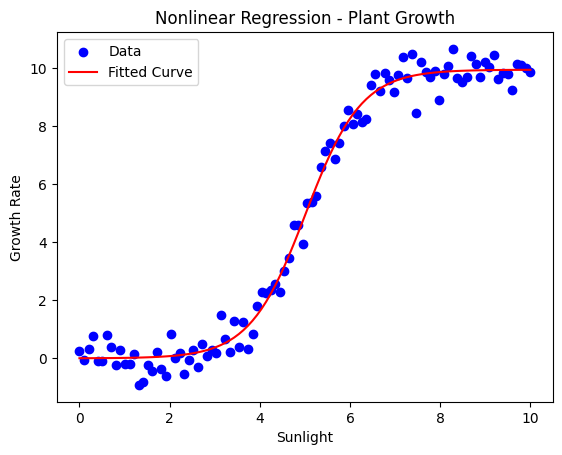

In [6]:
# Define the nonlinear function (e.g., a logistic growth model)
def growth_model(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

# Generate synthetic data
np.random.seed(42)
sunlight = np.linspace(0, 10, 100)
growth_rate = growth_model(sunlight, 10, 1.5, 5) + np.random.normal(0, 0.5, sunlight.size)

# Fit the model to the data
popt, pcov = curve_fit(growth_model, sunlight, growth_rate, p0=[10, 1, 5])

# Generate fitted data using the optimized parameters
fitted_growth_rate = growth_model(sunlight, *popt)

# Create a DataFrame
data_nonlinear = pd.DataFrame({
    'Sunlight': sunlight,
    'GrowthRate': growth_rate,
    'FittedGrowthRate': fitted_growth_rate
})

# Plot the data and the fitted curve
plt.scatter(data_nonlinear['Sunlight'], data_nonlinear['GrowthRate'], color='blue', label='Data')
plt.plot(data_nonlinear['Sunlight'], data_nonlinear['FittedGrowthRate'], color='red', label='Fitted Curve')
plt.xlabel('Sunlight')
plt.ylabel('Growth Rate')
plt.title('Nonlinear Regression - Plant Growth')
plt.legend()
plt.show()

#2. Analyzing Nested or Clustered Data

In [7]:
np.random.seed(42)

# Generate data
schools = ['School_A', 'School_B', 'School_C']
n_schools = len(schools)
n_classes_per_school = 5
n_students_per_class = 20

school_ids = np.repeat(schools, n_classes_per_school * n_students_per_class)
class_ids = np.tile(np.repeat(range(n_classes_per_school), n_students_per_class), n_schools)
student_ids = np.arange(n_schools * n_classes_per_school * n_students_per_class)

# Random effects for schools and classes
school_effect = np.repeat(np.random.normal(0, 1, n_schools), n_classes_per_school * n_students_per_class)
class_effect = np.tile(np.repeat(np.random.normal(0, 1, n_classes_per_school), n_students_per_class), n_schools)

# Student performance is influenced by school, class, and individual factors
performance = 50 + school_effect + class_effect + np.random.normal(0, 5, student_ids.size)

# Create DataFrame
data_nested = pd.DataFrame({
    'School': school_ids,
    'Class': class_ids,
    'StudentID': student_ids,
    'Performance': performance
})

print(data_nested.head())

     School  Class  StudentID  Performance
0  School_A      0          0    49.672372
1  School_A      0          1    54.732544
2  School_A      0          2    49.702656
3  School_A      0          3    49.691095
4  School_A      0          4    53.229555


#3. Regularization Methods

In [8]:
# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

# Convert to DataFrame
data_regularization = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])
data_regularization['Price'] = y

print(data_regularization.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -1.289961  -0.335785  -0.272724  -0.259591  -0.245743  -1.295079   
1   1.206509   0.368673   0.046437   0.028745   0.191099  -0.816936   
2   0.935678   0.721672   0.712998  -0.524520  -1.222128   1.271555   
3  -0.016423   2.526932   1.846707  -0.489439   0.681891   1.188393   
4   0.981765  -2.499406   2.439752  -1.389572   1.022570  -0.324831   

   Feature_7  Feature_8  Feature_9  Feature_10       Price  
0  -1.503143  -0.054295   1.669022   -2.696887 -232.604414  
1   1.278452   0.746254  -0.393339   -1.359856   74.887563  
2   0.489375  -0.374821  -1.129052   -0.240325    9.706270  
3   1.044161  -0.359292  -0.530869    0.583928  264.679551  
4  -1.645399   0.563909   2.290943    1.384273  293.390595  
